In [93]:
import pandas as pd
from torch.utils.data import Dataset
from skimage import io
import numpy as np
import torch
import matplotlib.pyplot as plt

In [99]:
dataset = pd.read_csv('diganens.csv',index_col=0)

Index(['img_name', 'category', 'bird', 'bull', 'bull-man', 'crescent', 'cross',
       'disc-in-crescent', 'dog', 'drill hole(s)', 'fly', 'goat', 'god',
       'goddess', 'horizontal/vertical line(s)', 'inscription (framed)',
       'inscription (unframed)', 'king', 'lion', 'lion-griffin', 'man',
       'monkey', 'nude woman', 'priest', 'rhomb', 'rosette', 'six-curled hero',
       'star', 'sun-god', 'suppliant goddess', 'tree', 'vessel',
       'warring goddess'],
      dtype='object')

In [160]:
class DiganesDataset(Dataset):
    """Diganses seals dataset."""

    def __init__(self, csv_file, root_dir, category=None, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with labels.
            root_dir (string): Directory with all the images.
            category (string, optional): Optional ilustration type, can be 'drawing' or 'photo'.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        
        labels = pd.read_csv(csv_file)
        
        #filter only specifc type of ilusration
        if category:
            labels = labels[labels.category == category]
        
        self.labels_frame = labels.drop('category', axis=1)
        self.labels_name = self.labels_frame.columns[2:]
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.labels_frame.loc[idx, "img_name"])
        image = io.imread(img_name)
        labels = np.array(self.labels_frame.iloc[idx, 2:])
 
        sample = {'image': image, 'labels': labels}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def show_image(self, image, labels):
        """Show image with labels"""
        img_label_names = self.labels_name[(labels > 0)].tolist()
        plt.imshow(image)
        plt.title(img_label_names)

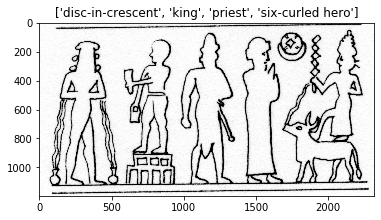

In [162]:
label_file = '/Users/atad/Desktop/DIGANES/diganes/diganens.csv'
pic_dir = '/Users/atad/Desktop/DIGANES/pics'
diganes = DiganesDataset(label_file, pic_dir, category='drawing')

sample = diganes[150]
diganes.show_image(sample['image'], sample['labels'])